In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

#### Importing and reading datasets from google drive.

In [ ]:
feature_dataset = pd.read_csv('/content/drive/MyDrive/data/features.csv')
sale_dataset = pd.read_csv('/content/drive/MyDrive/data/sales_data.csv')
store_dataset = pd.read_csv('/content/drive/MyDrive/data/stores.csv')


#### Performing Exploratory Data Analysis.

In [ ]:
sale_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
feature_dataset.head()
#tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
store_dataset.head()
#tail()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
#Getting the shape of sales dataset.
sale_dataset.shape

(421570, 5)

In [ ]:
#Getting the last 5 values from the dataset.
sale_dataset.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [ ]:
#Displaying first 5 entries from store dataset.
store_dataset.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
feature_dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


##### Datatypes in sale_dataset.

In [ ]:
sale_dataset.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

#### Checking for the null values in sale_dataset.

In [ ]:
sale_dataset.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

#### Shape of sale_dataset.

In [ ]:
sale_dataset.shape

(421570, 5)

In [ ]:
sale_dataset.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
# Getting the number of uniques values for each column.
sale_dataset.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [ ]:
# Generating descriptive statistics with the sales data.
sale_dataset.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
# Here Checking the weekly sales data.
check_sales_data = sale_dataset.loc[sale_dataset['Weekly_Sales'] <=0]
check_sales_data.shape

(1358, 5)

In [ ]:
check_sales_data.nunique()

Store            45
Dept             51
Date            143
Weekly_Sales    679
IsHoliday         2
dtype: int64

In [ ]:
#Checking it after the above operation.
#Picking portions of 2 columns.
check_sales_data.shape[0]/sale_dataset.shape[0]

0.003221291837654482

In [ ]:
#Does it affects the data?
#Converting the datatype of series below.
sale_dataset['Store'] = sale_dataset['Store'].astype(str)
sale_dataset['Dept'] = sale_dataset['Dept'].astype(str)
sale_dataset['IsHoliday'] = sale_dataset['IsHoliday']*1

In [ ]:
# Droping the above records as it affects small percentage of the data.
sale_data_2 = sale_dataset.loc[sale_dataset['Weekly_Sales']>0]
sale_data_2.shape

(420212, 5)

In [ ]:
# Defining a function for executing operations of series.
#Part of Data cleaning and preprocessing.
#Getting the markdown columns.
def task(df_name):

  print('DataFrame Shape: ' + str(df_name.shape))
  #Display the shape of dataframe
  print('\n')
  print('Column names and their datatypes')
  print(df_name.dtypes.sort_values())
  #Sort for the column values.
  print('\n')
  print('Statistics:')
  print(df_name.describe())
  #Describing the data with the basic statistical function.
  print('\n')
  print('Missing values from columns:')
  print(df_name.isna().sum().sort_values())
  #Checking if null and sort the values.

In [ ]:
task(feature_dataset)

DataFrame Shape: (8190, 12)


Column names and their datatypes
IsHoliday          bool
Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Date             object
dtype: object


Statistics:
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000 

In [ ]:
# Store dataset.
#astype(str)- converting it to string.
feature_dataset['Store'] = feature_dataset['Store'].astype(str)
store_dataset['Store'] = store_dataset['Store'].astype(str)
#Checking the dataset and droping the holiday column.
feat_2 = feature_dataset.drop(['IsHoliday'], axis=1)

In [ ]:
feat_2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


#### Checking for the null/missing values in dataset and replacing it with the mean.

In [ ]:
# Dealing with missing values.
# Python Imputation.
# CPI- Consumer Price Index.
feat_2['Unemployment'].fillna(feat_2['Unemployment'].mean(),
                              inplace = True)

feat_2['CPI'].fillna(feat_2['CPI'].mean(),
                     inplace = True)

In [ ]:
# Here in the half of the cases, Markdown variables are missing.
feat_2.fillna(0, inplace = True)
store_dataset.groupby('Type').agg({'Size' : 'mean'})

,Size
Type,
A,177247.727273
B,101190.705882
C,40541.666667


#### Grouping the Data.

In [ ]:
# Working with Store, Dept and Date.
# Stores unique key = Store.
# Then, Feature_data - store + data.

feat_2.groupby(['Store', 'Date']).size().shape[0] - feat_2.shape[0]
# Grouping with the Store and Date.
sale_dataset.groupby(['Store', 'Dept', 'Date']).size().shape[0]-sale_dataset.shape[0]

0

#### Merging these datasets.

In [ ]:
#Applying the inner join here.
sale_feature_dataset = pd.merge(sale_data_2, feat_2, on = ['Store', 'Date'], how = 'inner')
#Checking the shape of dataset.
sale_feature_dataset.shape

(420212, 14)

In [ ]:
combine_data = pd.merge(sale_feature_dataset, store_dataset, on = 'Store', how = 'inner')
combine_data.shape

(420212, 16)

#### Combine

In [ ]:
# Working on COMBINE DATA.
combine_data['Date2'] = pd.to_datetime(combine_data['Date'],
                                       format = '%Y-%m-%d')
print(combine_data['Date2'].nunique())
new_combine_format = (combine_data['Date2'].max() - combine_data['Date2'].min())
print(new_combine_format/7)

143
142 days 00:00:00


#### 70% of date's data and dividing the original data.

In [ ]:
dates_unique = pd.DataFrame(combine_data['Date2'].unique(), columns = ['date'])
dates_unique.sort_values('date', inplace = True)
splt = round(dates_unique.shape[0]*0.7,0)
date_splt = dates_unique.iloc[int(splt)-1]['date']
date_splt

Timestamp('2011-12-30 00:00:00')

#### spliting using the Date.

In [ ]:
train_combine = combine_data.loc[combine_data['Date2'] <= date_splt]
test_combine = combine_data.loc[combine_data['Date2']> date_splt]
train_combine.shape[0]/combine_data.shape[0]

0.6977525629920136

#### Performing Univariate Analysis on the Dataset

(array([7157., 7140., 6309., 7175., 6286., 7121., 6796., 6909., 6158.,
        7206., 6988., 6736., 7324., 6995., 6886., 6482., 6823., 6818.,
        7077., 7119., 6651., 6733., 7017., 7137., 6824., 6867., 7127.,
        7058., 6604., 4990., 7071., 7122., 4470., 7177., 6586., 4321.,
        4947., 5066., 6885., 6979., 6987., 4729., 4707., 4932., 6712.]),
 array([ 0.        ,  0.97777778,  1.95555556,  2.93333333,  3.91111111,
         4.88888889,  5.86666667,  6.84444444,  7.82222222,  8.8       ,
         9.77777778, 10.75555556, 11.73333333, 12.71111111, 13.68888889,
        14.66666667, 15.64444444, 16.62222222, 17.6       , 18.57777778,
        19.55555556, 20.53333333, 21.51111111, 22.48888889, 23.46666667,
        24.44444444, 25.42222222, 26.4       , 27.37777778, 28.35555556,
        29.33333333, 30.31111111, 31.28888889, 32.26666667, 33.24444444,
        34.22222222, 35.2       , 36.17777778, 37.15555556, 38.13333333,
        39.11111111, 40.08888889, 41.06666667, 42.04444444,

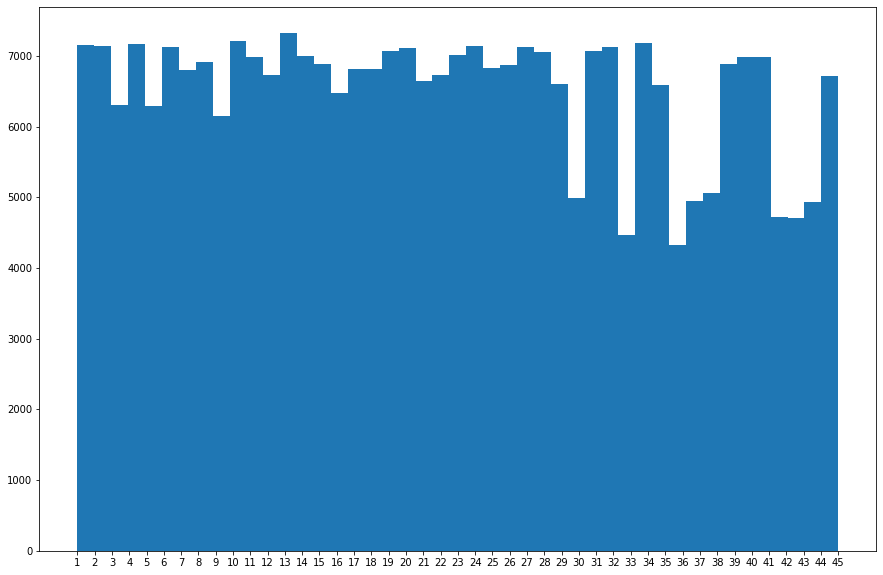

In [ ]:
plt.figure(figsize=(15, 10))
#Showing unique values of all the stores.

plt.hist(list(train_combine['Store']), bins = train_combine['Store'].nunique())

<ipython-input-38-287038a344aa>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_column = train_combine.select_dtypes(np.object).columns.tolist()


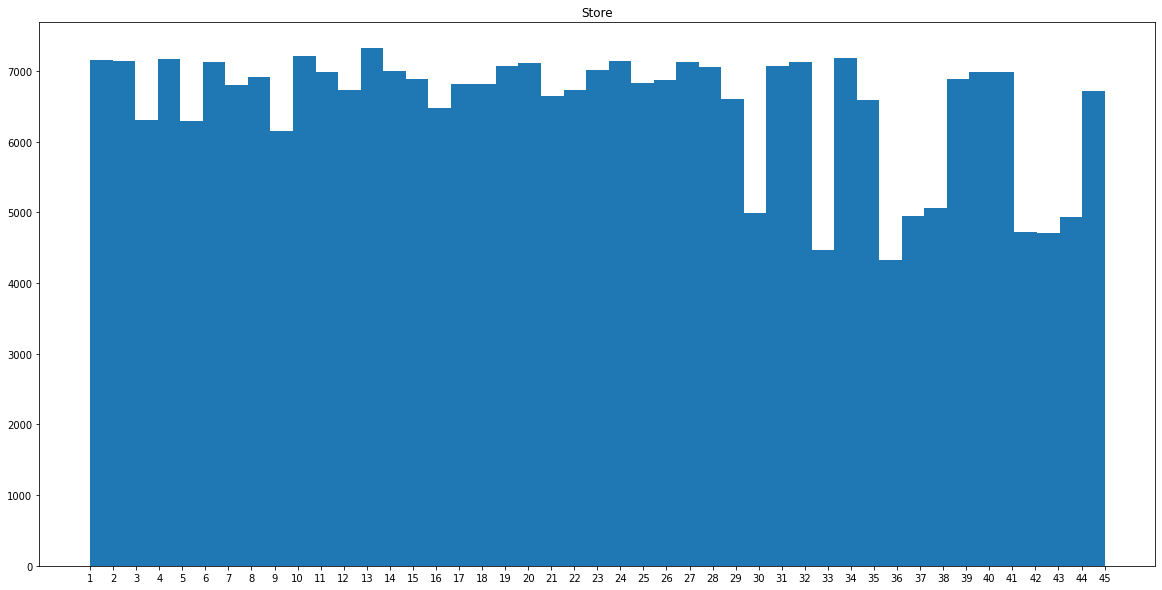

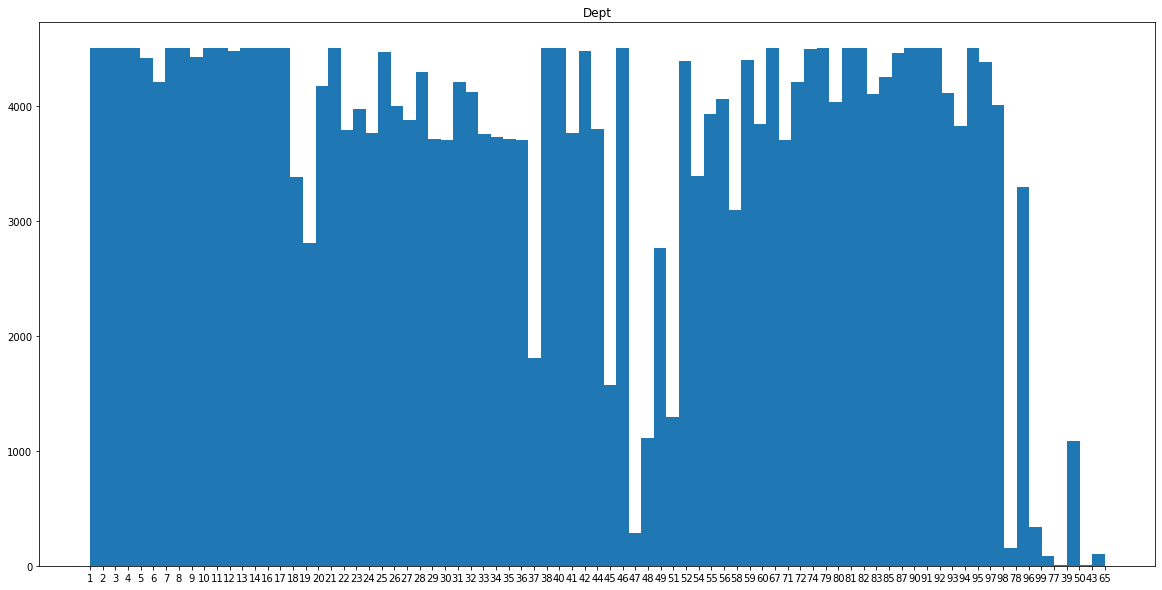

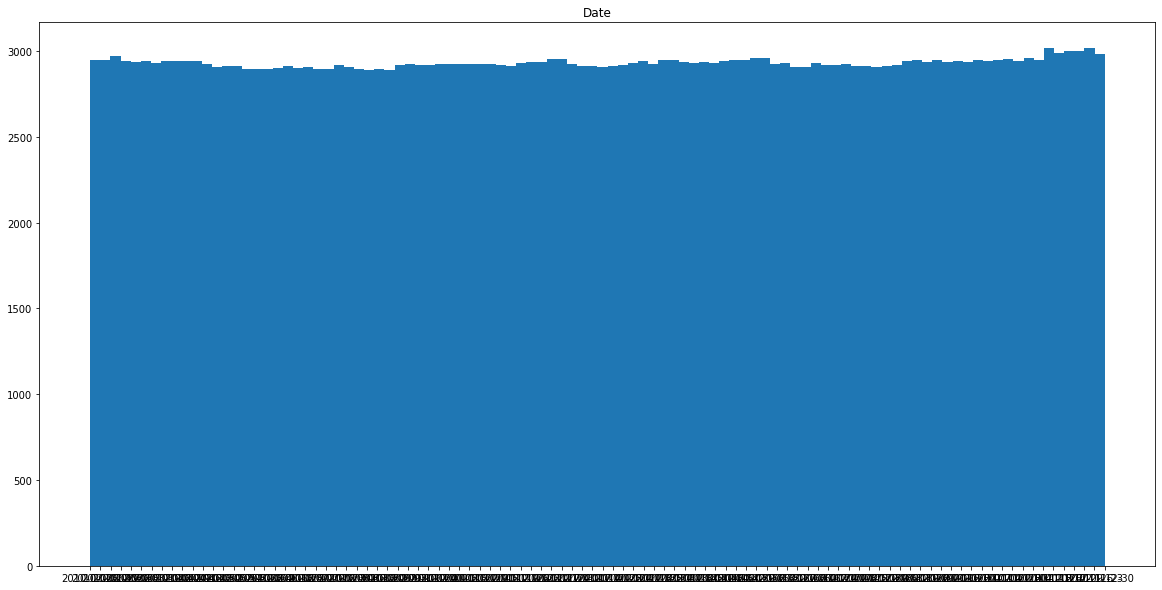

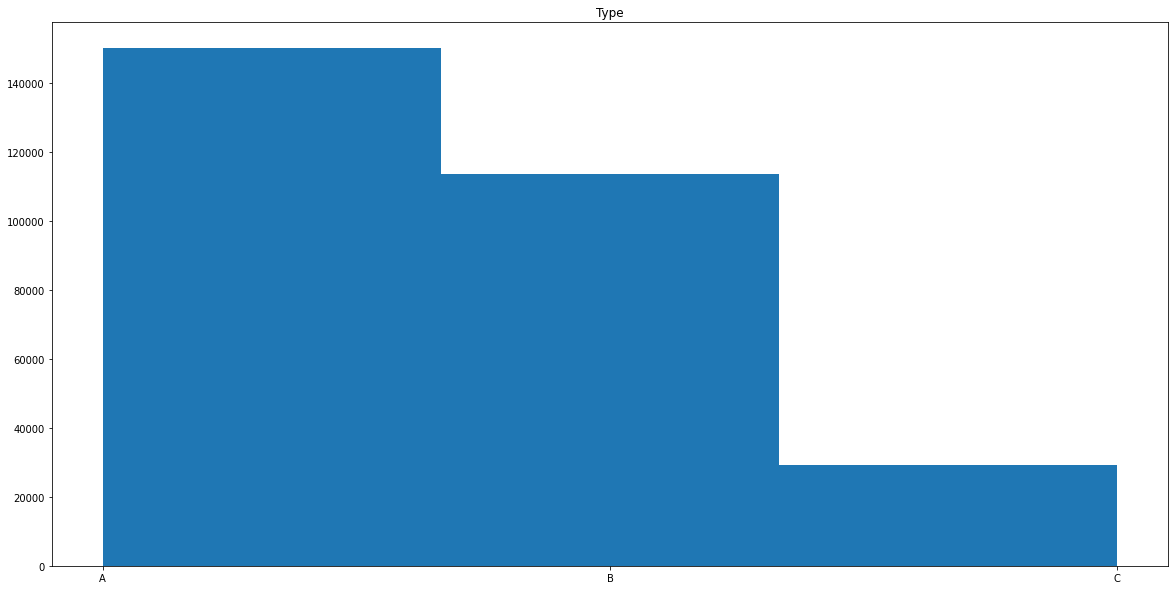

In [ ]:
#Picking the categorical data here.

categorical_column = train_combine.select_dtypes(np.object).columns.tolist()

for var in categorical_column:
  plt.figure(figsize= (20, 10))
  plt.hist(list(train_combine[var]), bins = train_combine[var].nunique())
  plt.title(var)
  plt.show

In [ ]:
num_columns = train_combine.select_dtypes(np.number).columns.tolist()
mark_columns = [x for x in num_columns if 'Mark' in x]
mark_columns
nonmark_columns = list(set(num_columns).difference(set(mark_columns)))
nonmark_columns

['IsHoliday',
 'Size',
 'Weekly_Sales',
 'CPI',
 'Fuel_Price',
 'Unemployment',
 'Temperature']

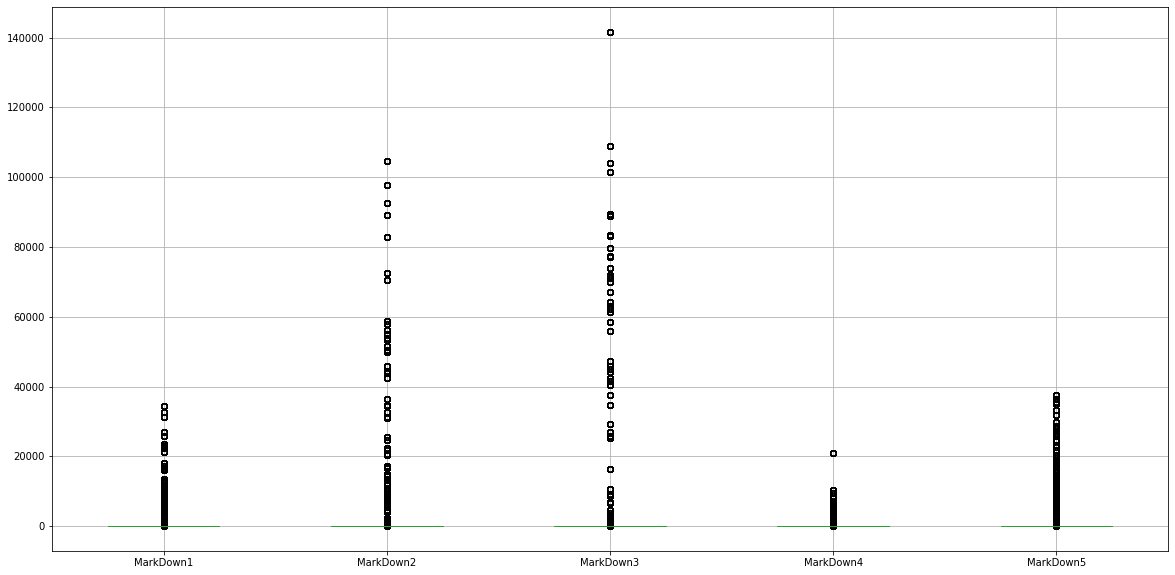

In [ ]:
train_combine.boxplot(column = mark_columns, figsize = (20, 10))

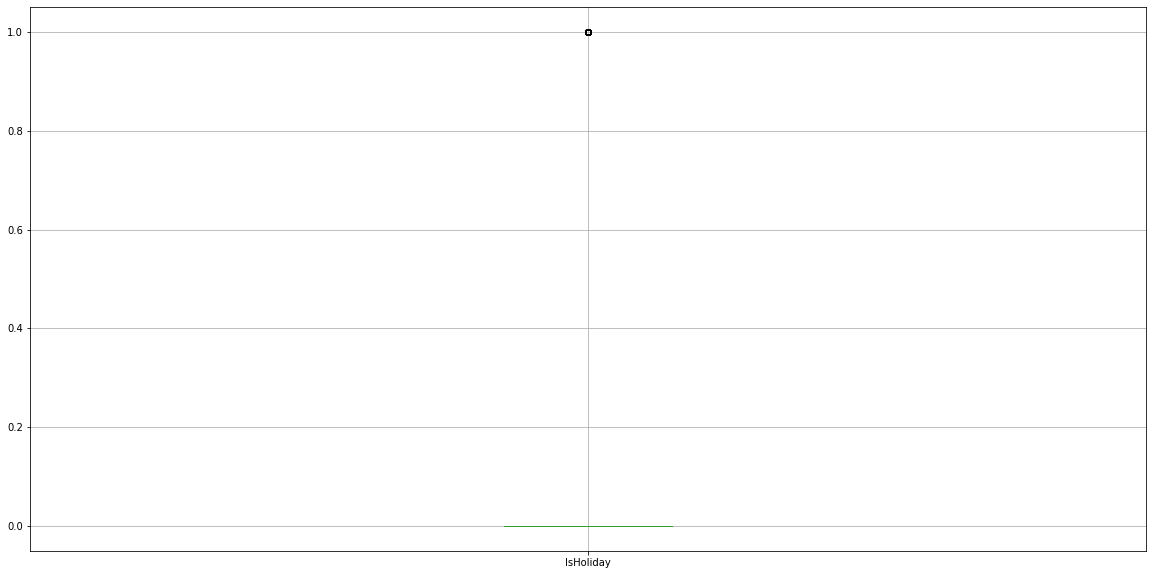

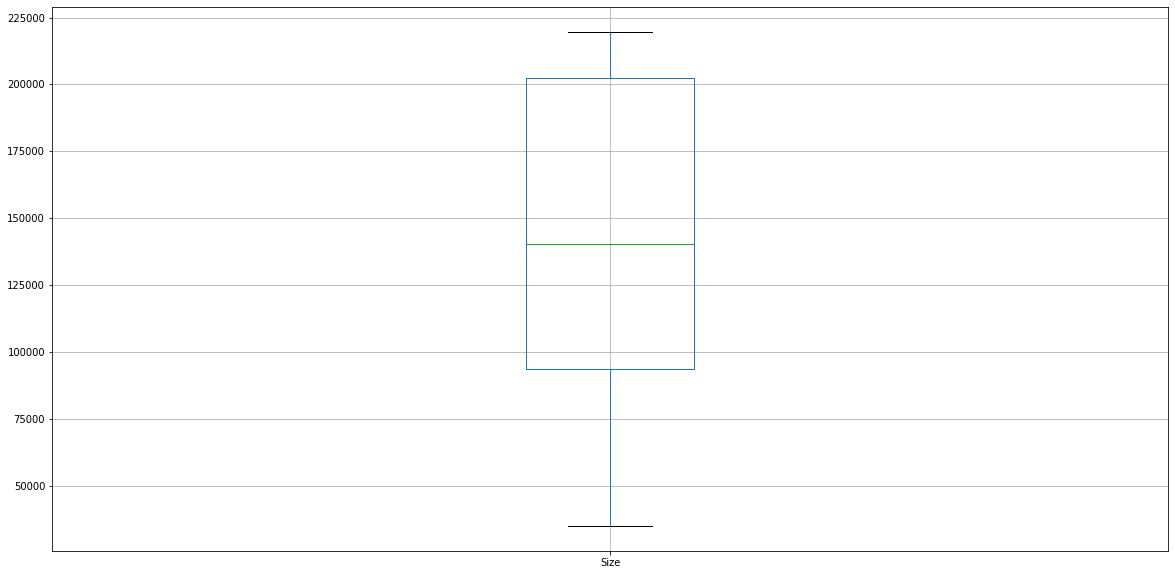

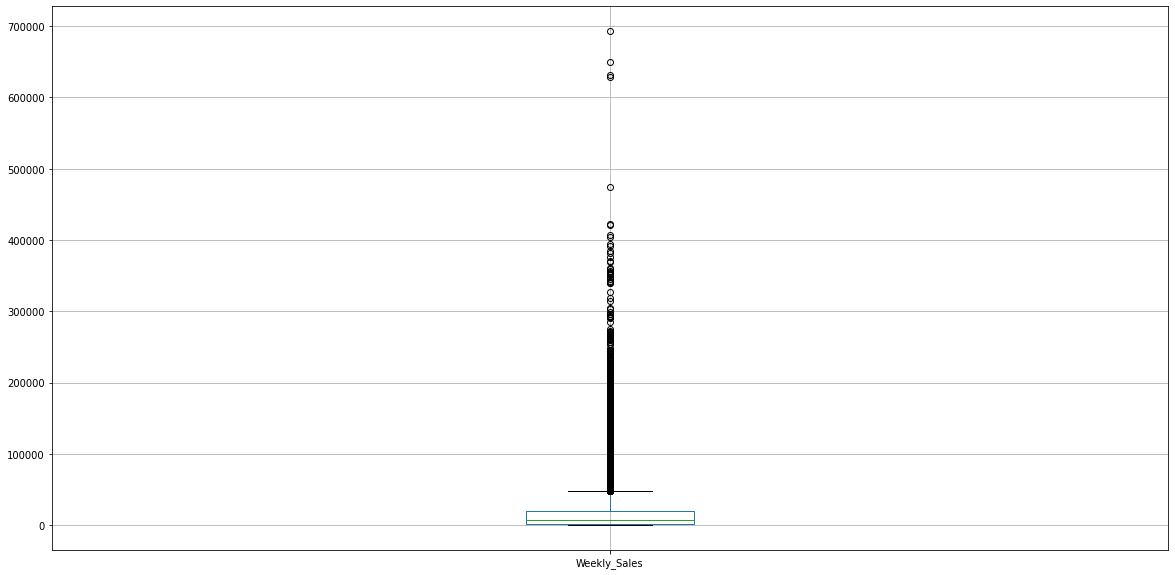

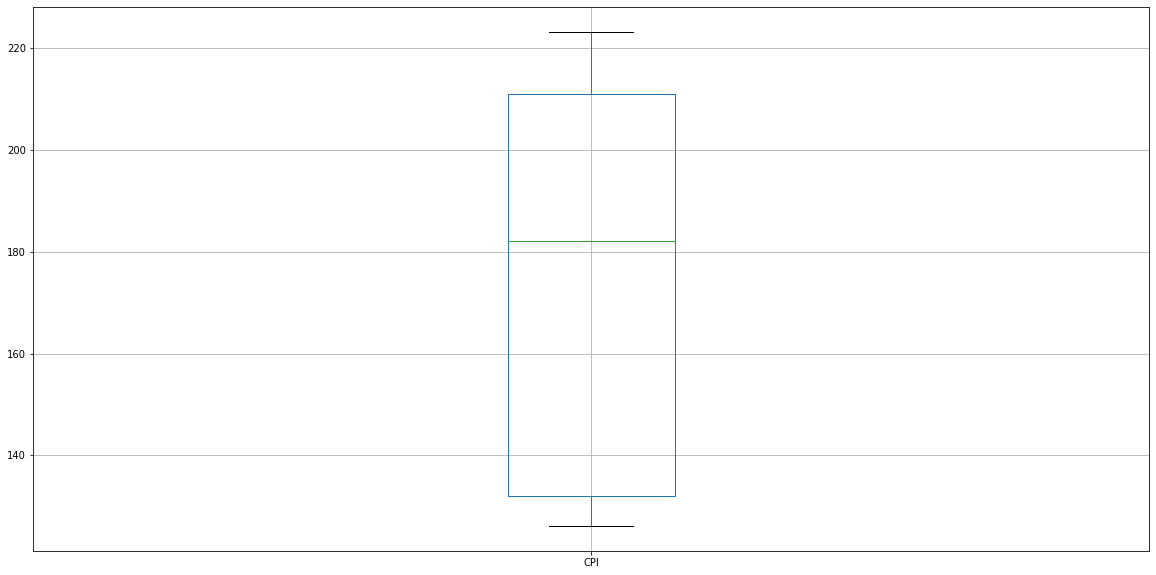

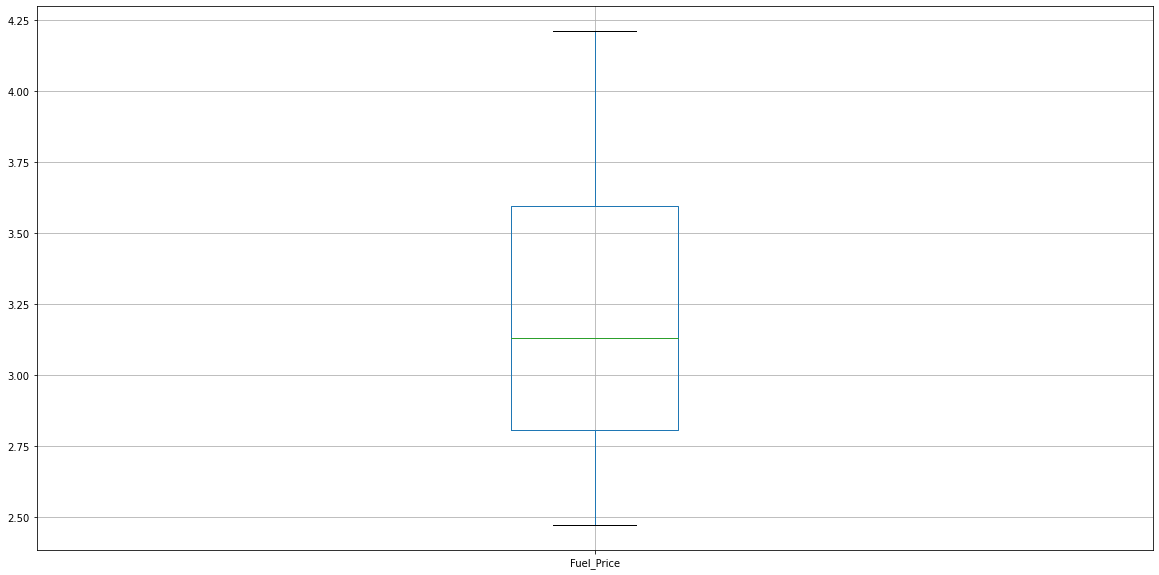

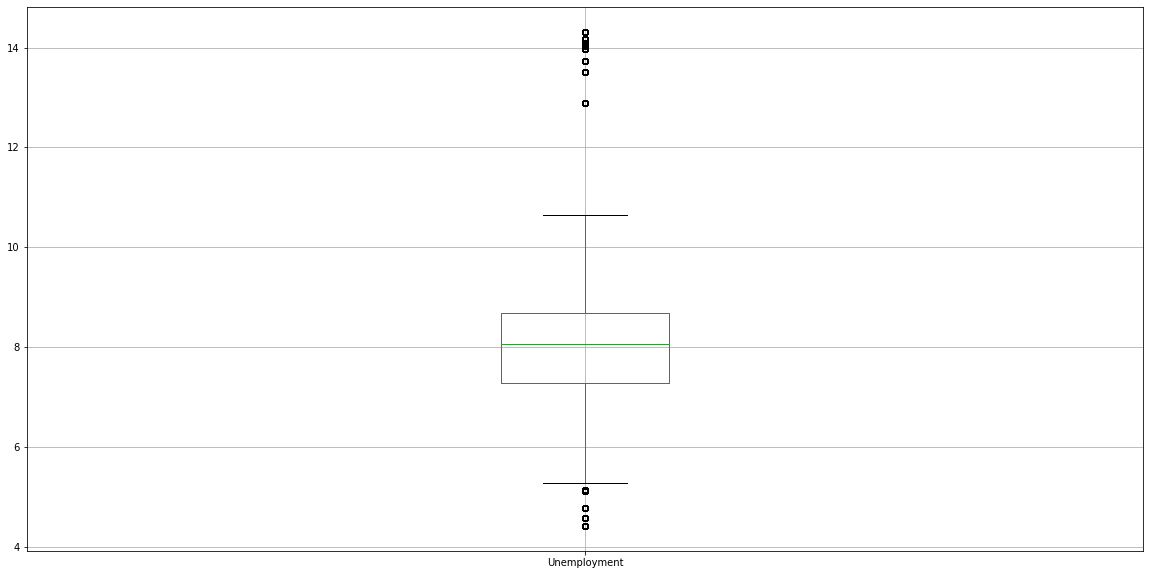

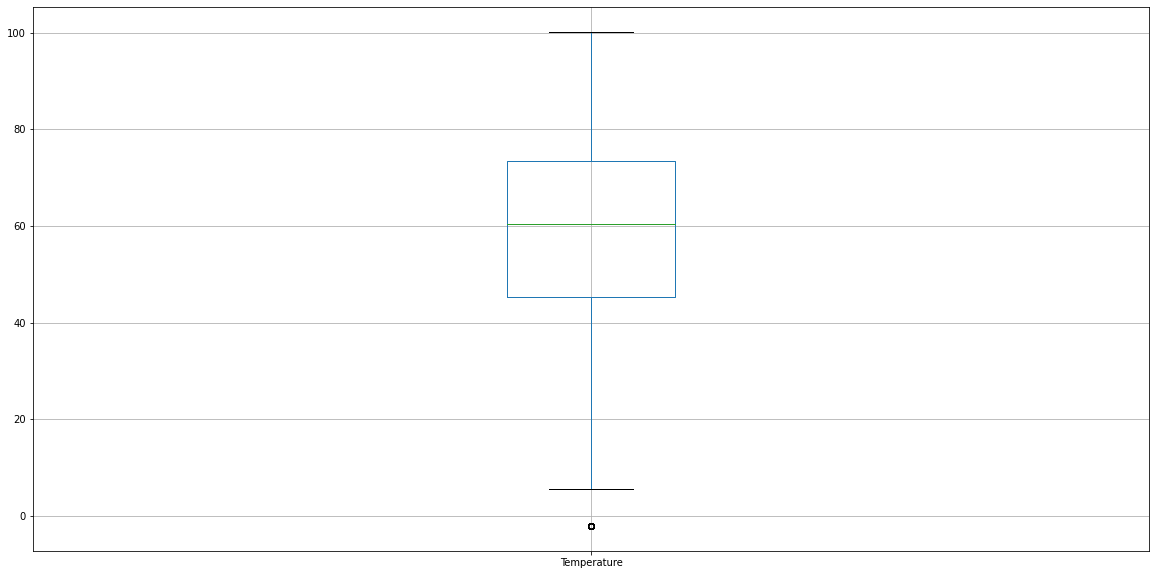

In [ ]:
for var in nonmark_columns:
  train_combine.boxplot(column = var, figsize = (20, 10))
  plt.show()

#### Applying Bivaraite Analysis

In [ ]:
num_train = train_combine[num_columns]
#Performing particulary on 'weekly_sales' data.
num_train = num_train.drop(['Weekly_Sales'], axis=1)
num_train.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315
1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315
2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315
3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315
4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315


In [ ]:
# Getting highly correlated variables.
correlated_values = num_train.corr().unstack().reset_index()
print(correlated_values.shape)
#Applying the correlation between the variables.
correlated_value_2 = correlated_values[correlated_values['level_0'] > correlated_values['level_1']]
print(correlated_value_2.shape)

correlated_value_2.columns = ['var1', 'var2', 'corr_value']
correlated_value_2['corr_abs'] = correlated_value_2['corr_value'].abs()
correlated_value_2.sort_values('corr_abs', ascending = False, inplace = True)
correlated_value_2.head(10)

(121, 3)
(55, 3)


<ipython-input-45-5491aa32014e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlated_value_2['corr_abs'] = correlated_value_2['corr_value'].abs()
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,var1,var2,corr_value,corr_abs
69,MarkDown4,MarkDown1,0.764146,0.764146
83,MarkDown5,MarkDown4,0.673759,0.673759
80,MarkDown5,MarkDown1,0.573937,0.573937
47,MarkDown2,MarkDown1,0.364552,0.364552
107,Unemployment,CPI,-0.298205,0.298205
55,MarkDown3,IsHoliday,0.296824,0.296824
44,MarkDown2,IsHoliday,0.272442,0.272442
70,MarkDown4,MarkDown2,0.232324,0.232324
30,Fuel_Price,CPI,-0.180454,0.180454
11,Temperature,IsHoliday,-0.178936,0.178936


#### Visualizing Correlation through heat map.

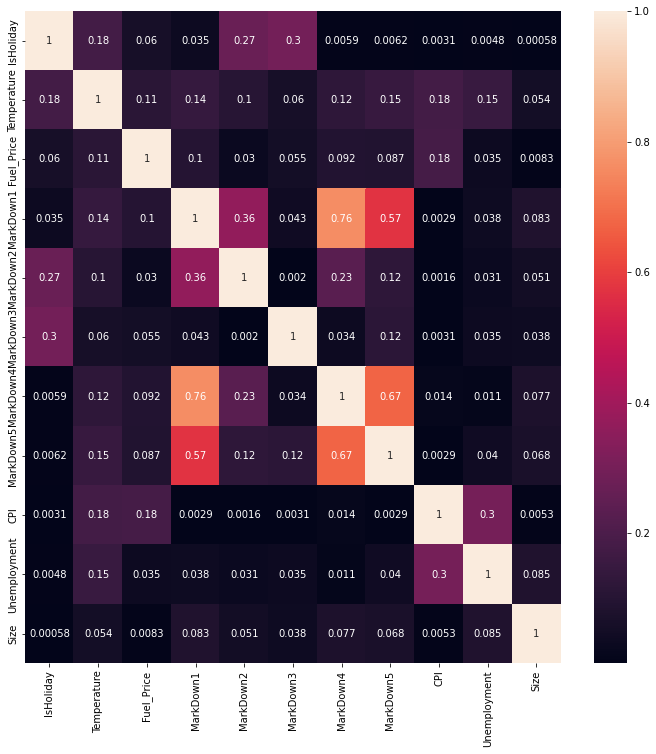

In [ ]:
plt.figure(figsize = (12, 12))
vg_corr = num_train.corr().abs()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values,yticklabels=vg_corr.columns.values, annot = True)

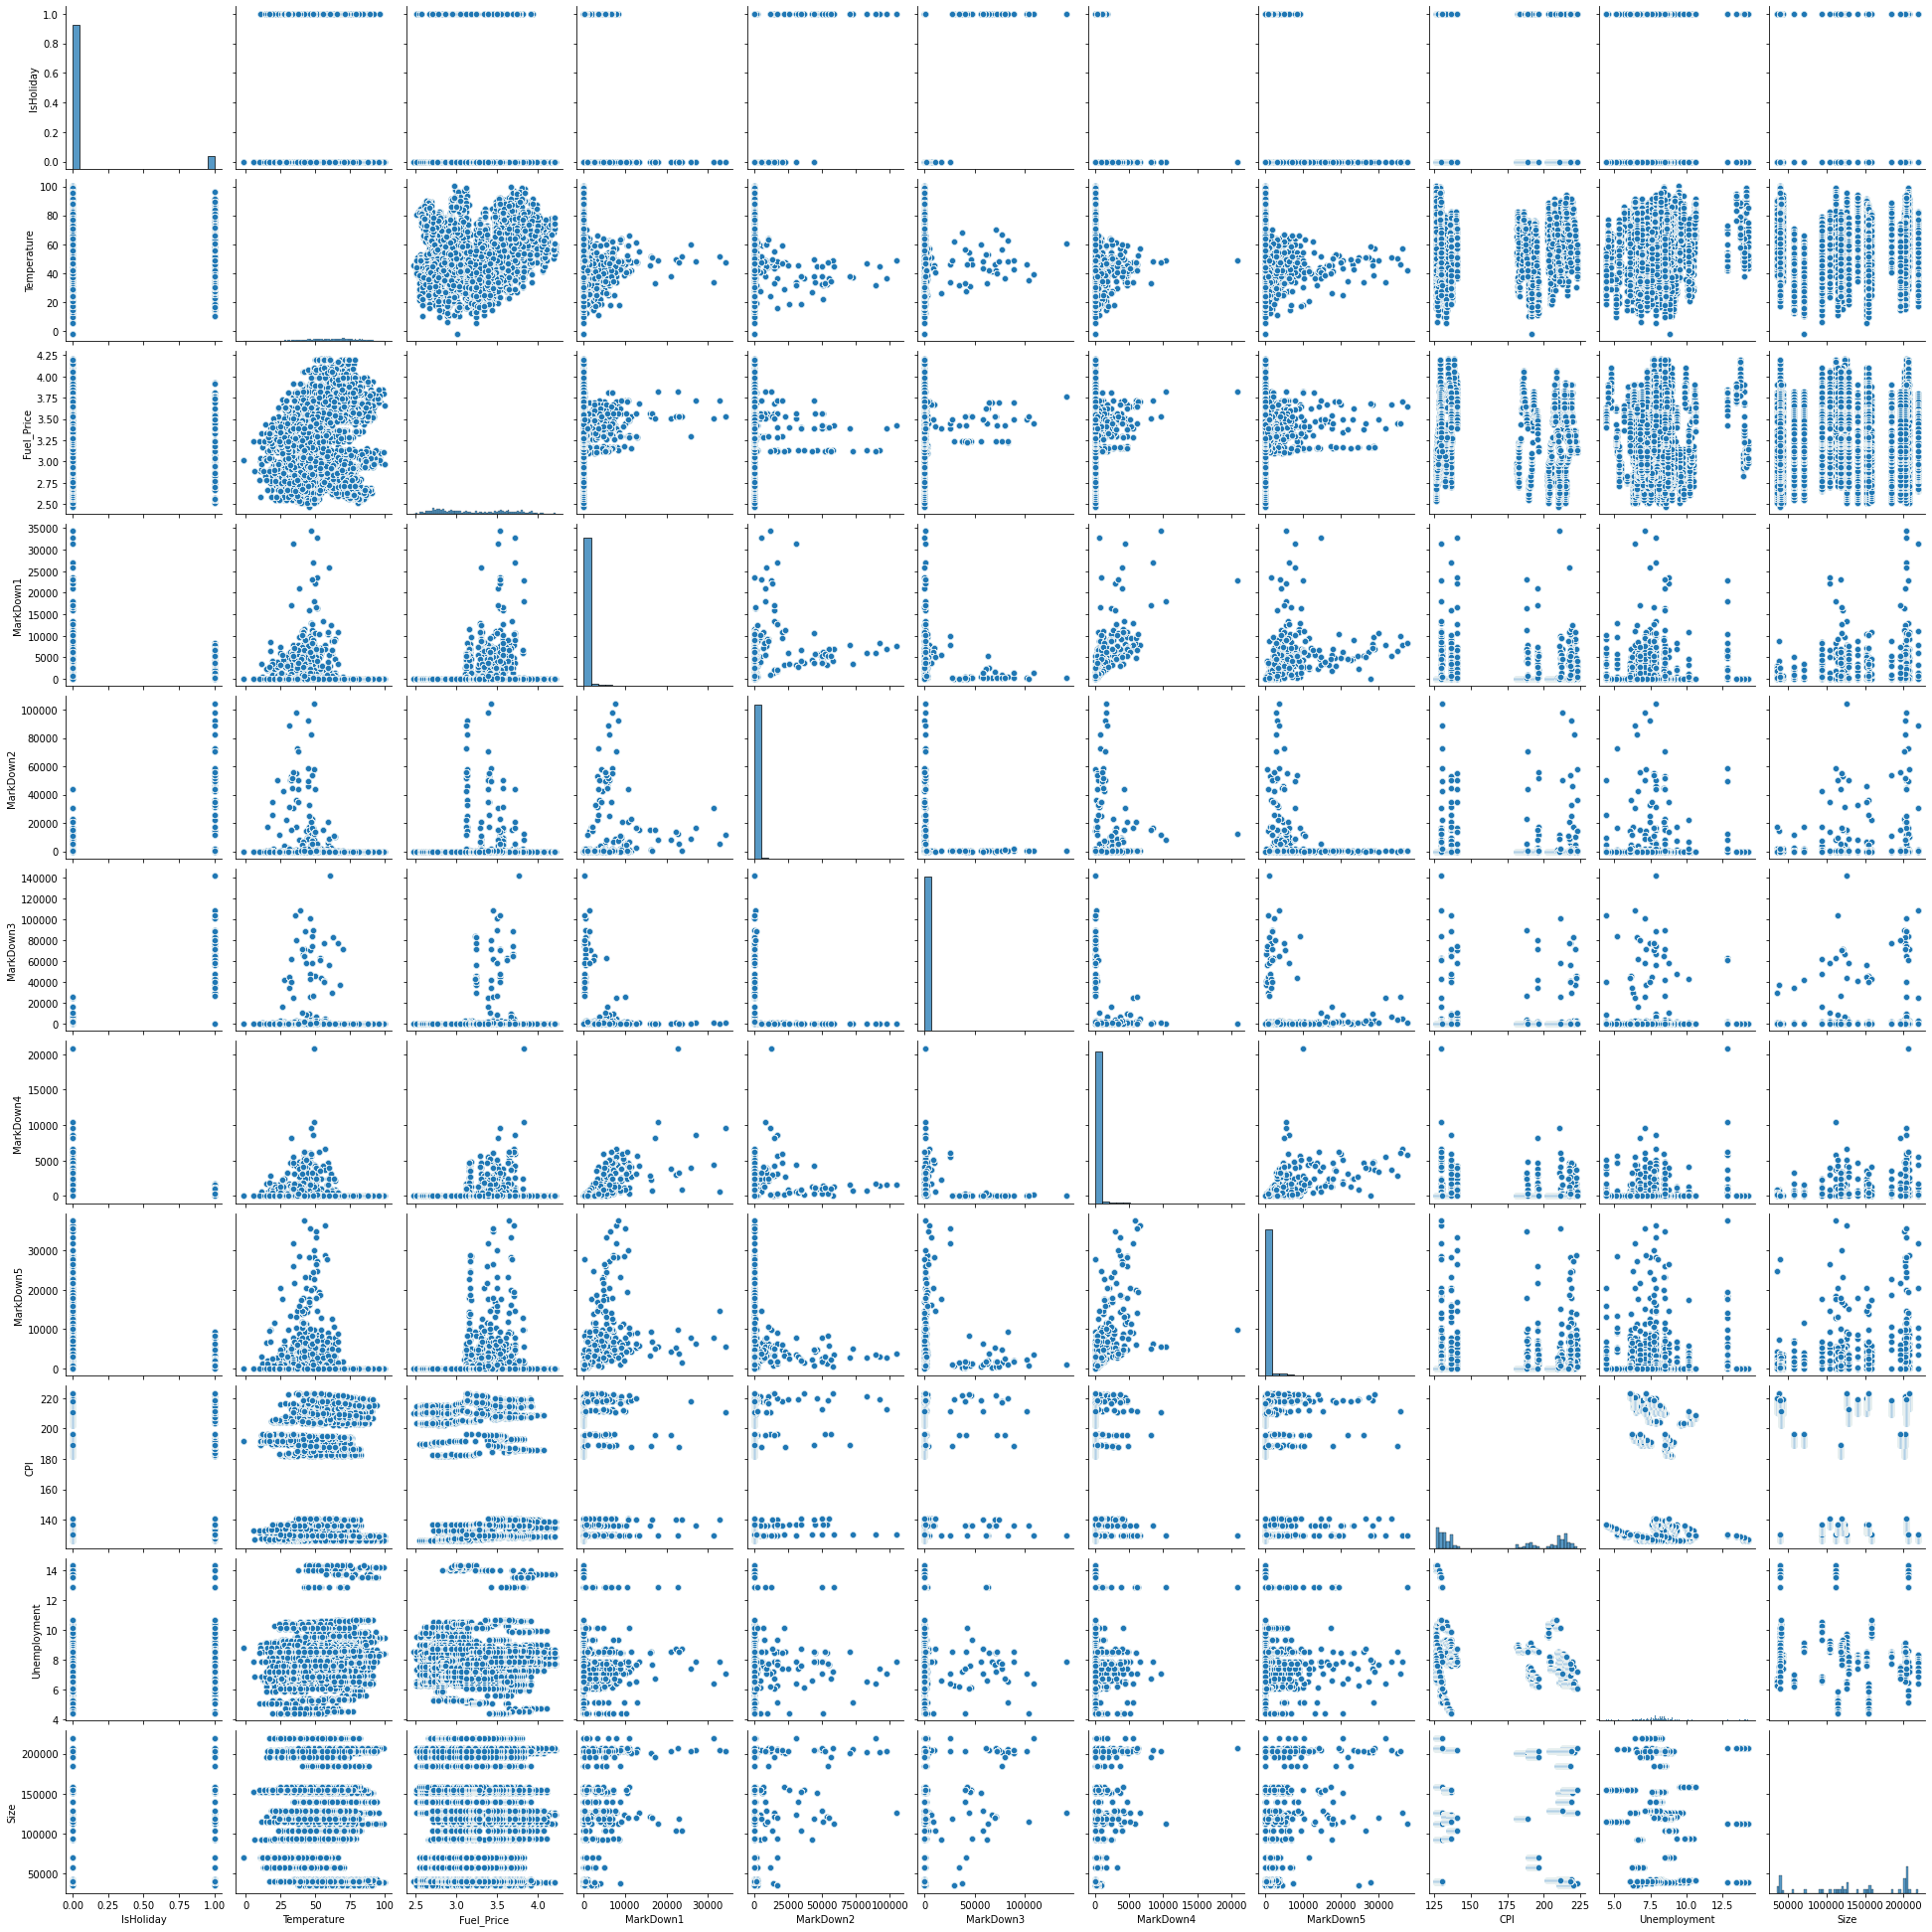

In [ ]:
sns.pairplot(num_train)

#### Getting Dependent variables.

Store
    Store  Weekly_Sales
0       1  1.542039e+06
11      2  1.938904e+06
22      3  3.956343e+05
33      4  2.067737e+06
40      5  3.130725e+05
Dept
    Dept  Weekly_Sales
0      1  8.819285e+05
10     2  1.955582e+06
21     3  5.210935e+05
32     4  1.161434e+06
43     5  1.021350e+06


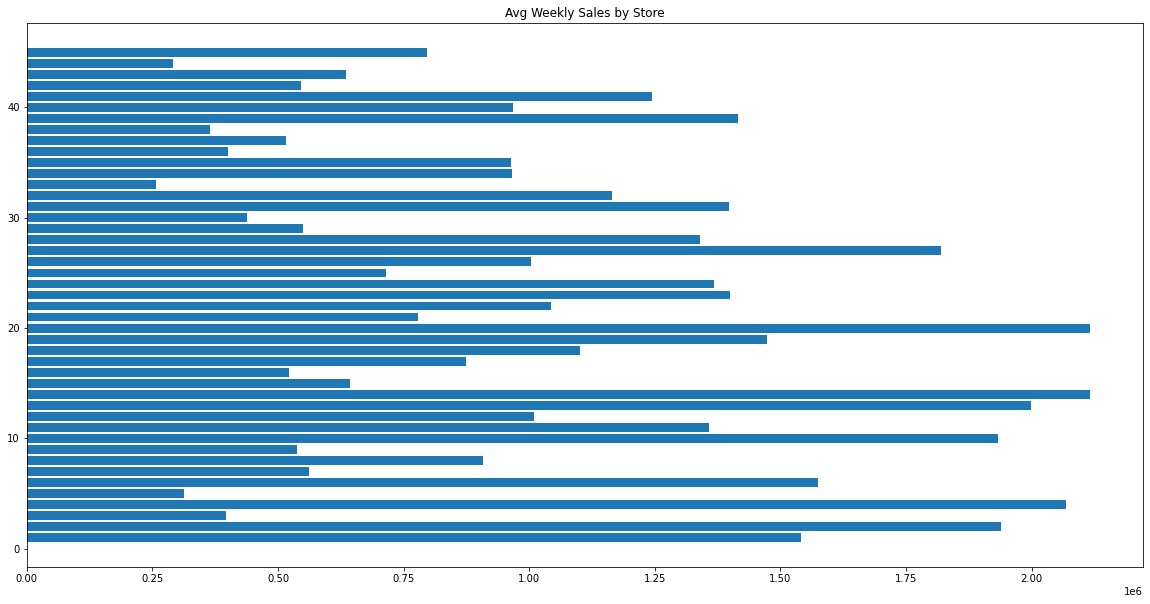

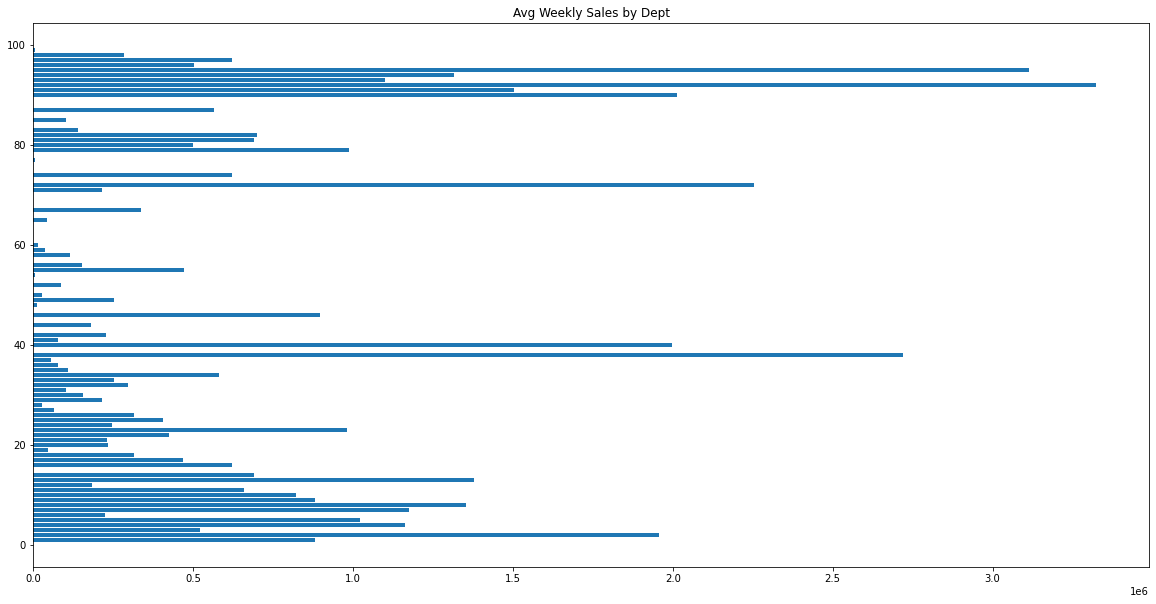

In [ ]:
# Stores and Department
for var in ['Store', 'Dept']:
    print(var)
    #Grouping by date.
    agg_temp = train_combine.groupby([var, 'Date'], as_index=False).agg({'Weekly_Sales': 'sum'})
    agg_temp2 = agg_temp.groupby([var], as_index=False).agg({'Weekly_Sales': 'mean'})   #average, sum of weekly sales data.
    #Getting weekly sales average by store
    agg_temp2[var] = pd.to_numeric(agg_temp2[var])
    agg_temp2.sort_values(var, inplace=True)
    print(agg_temp2.head())
    plt.figure(figsize=(20,10))
    plt.title('Avg Weekly Sales by ' + var)
    plt.barh(agg_temp2[var], agg_temp2['Weekly_Sales'])

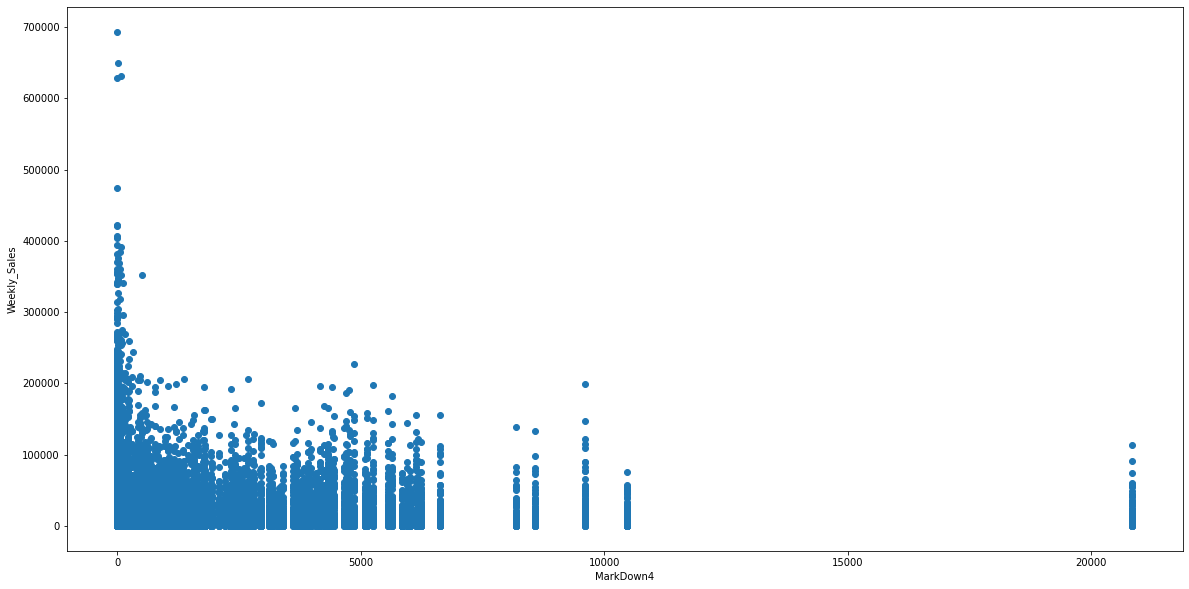

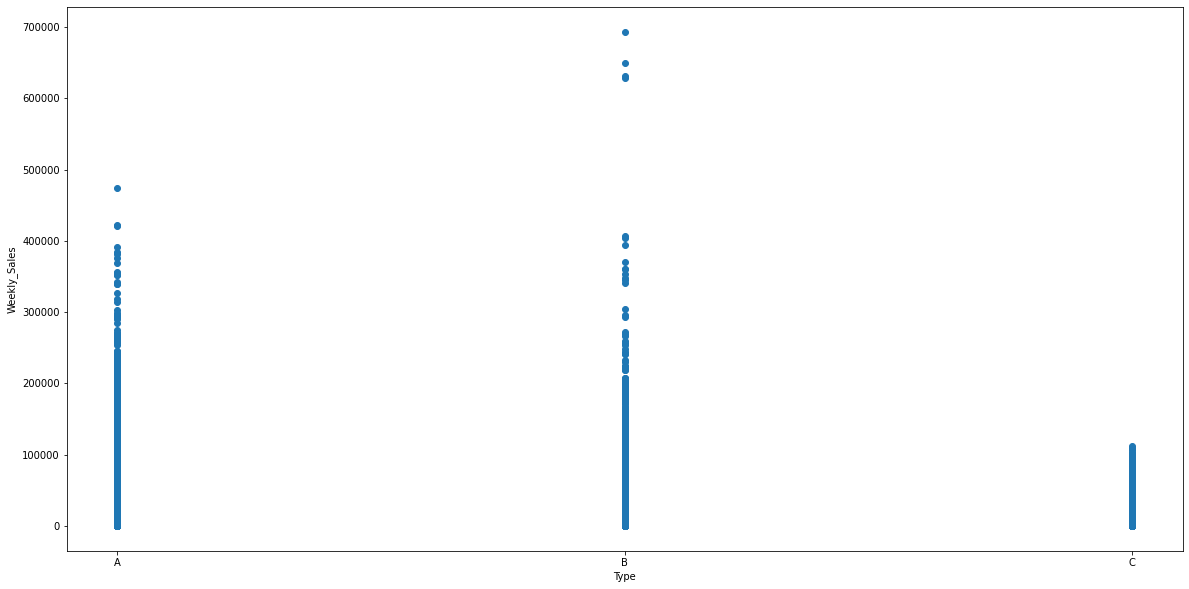

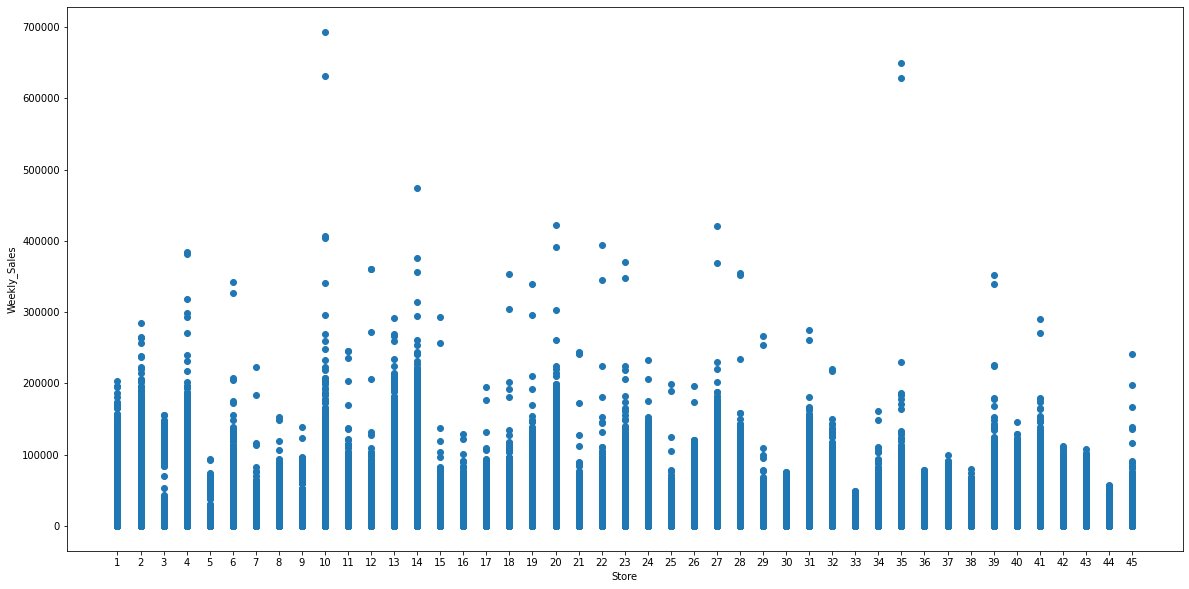

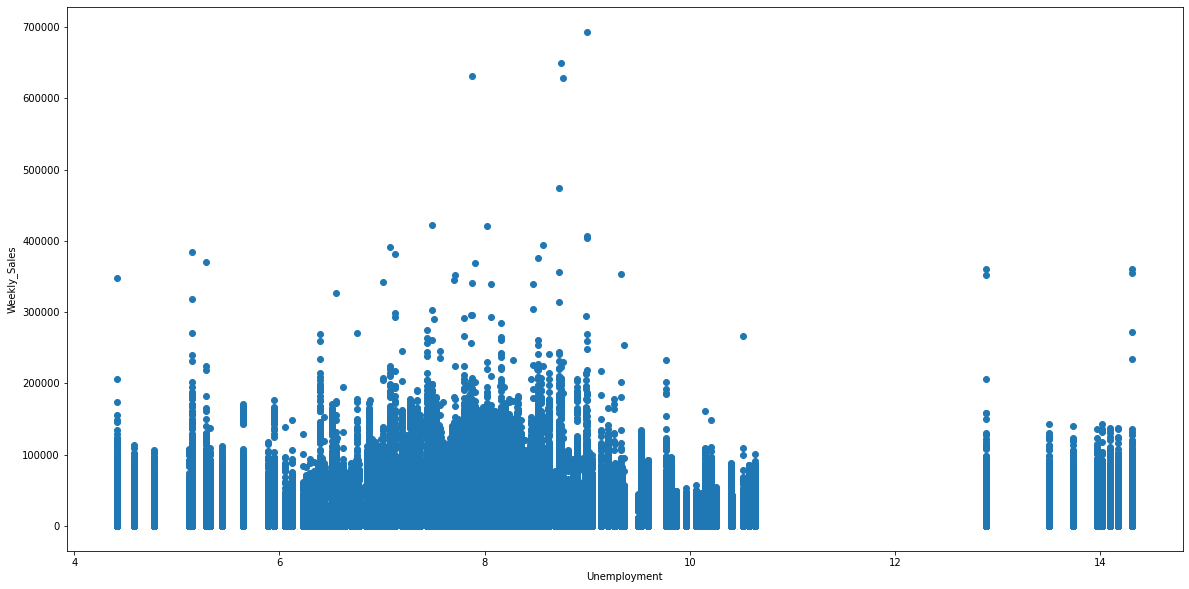

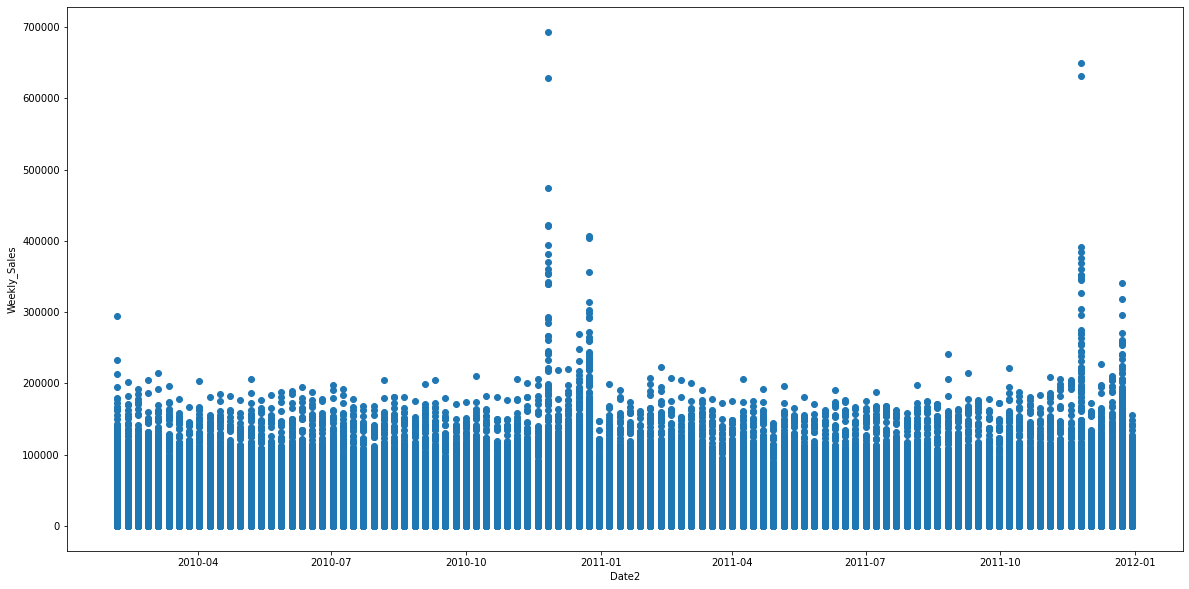

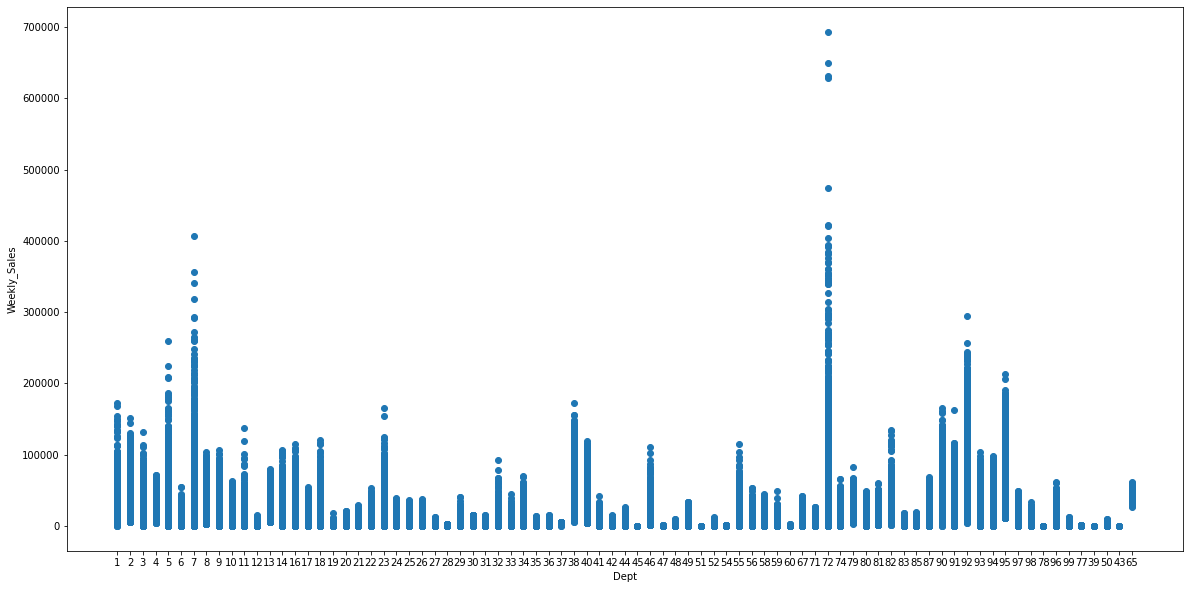

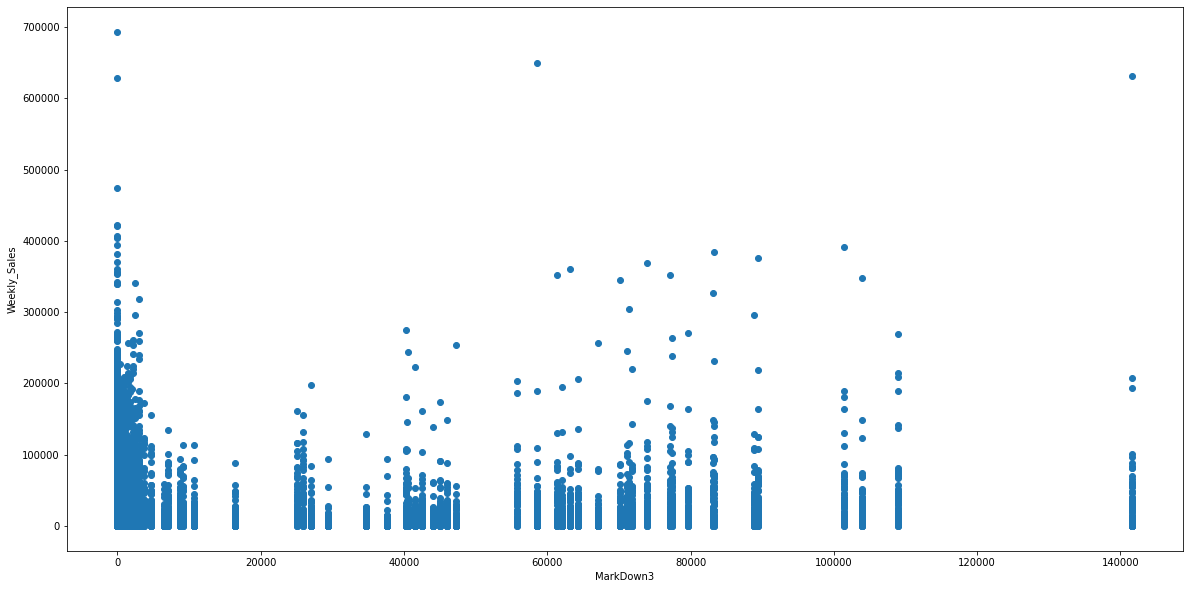

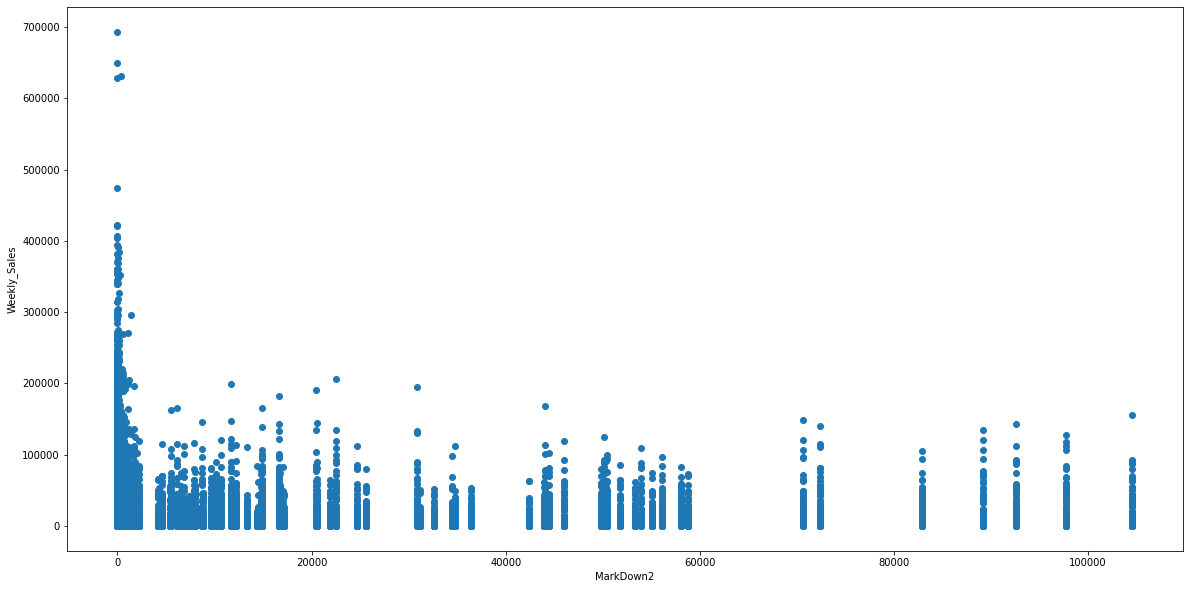

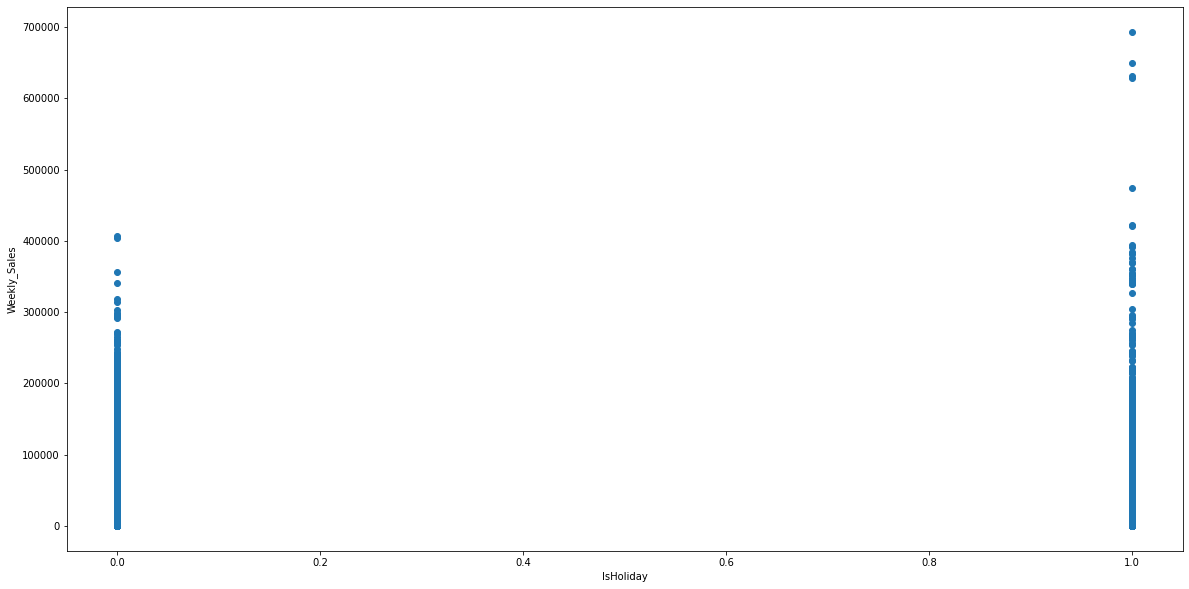

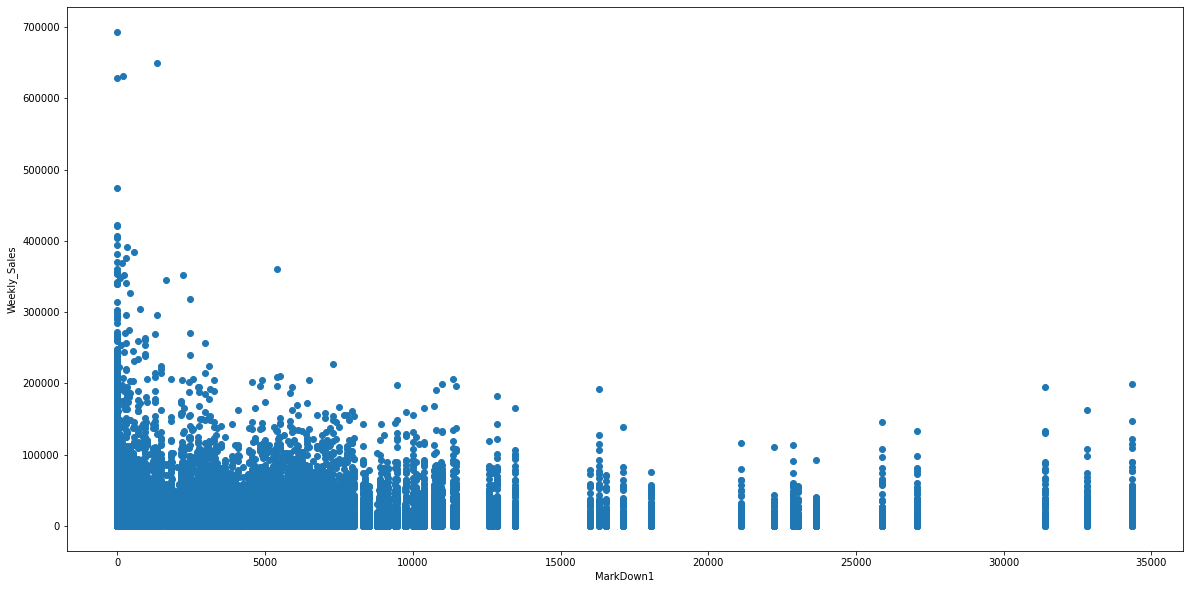

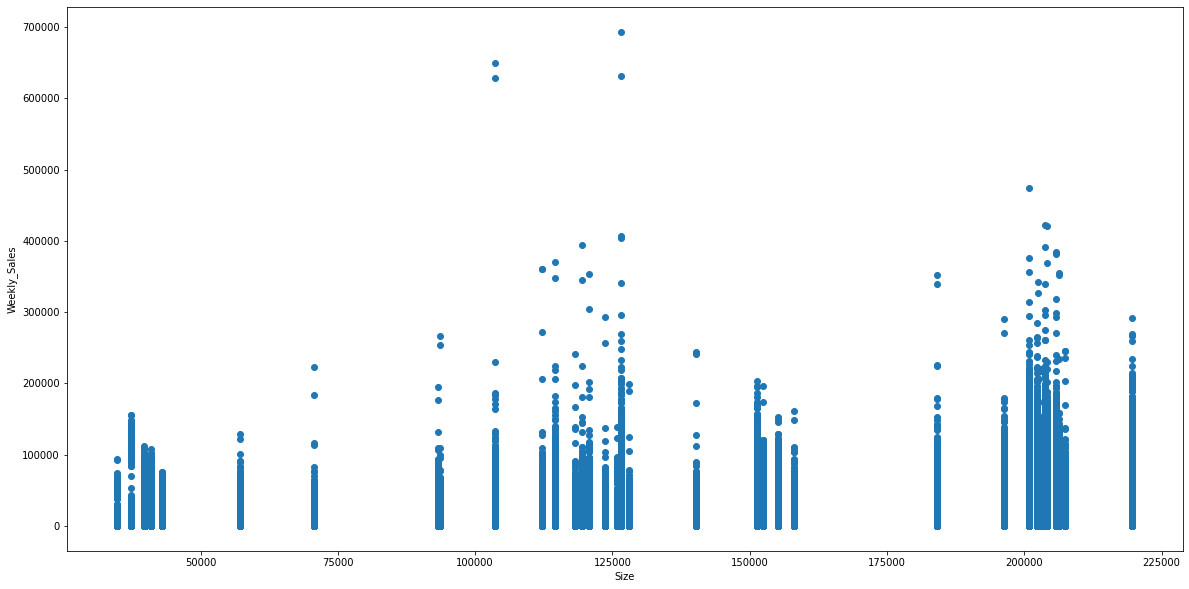

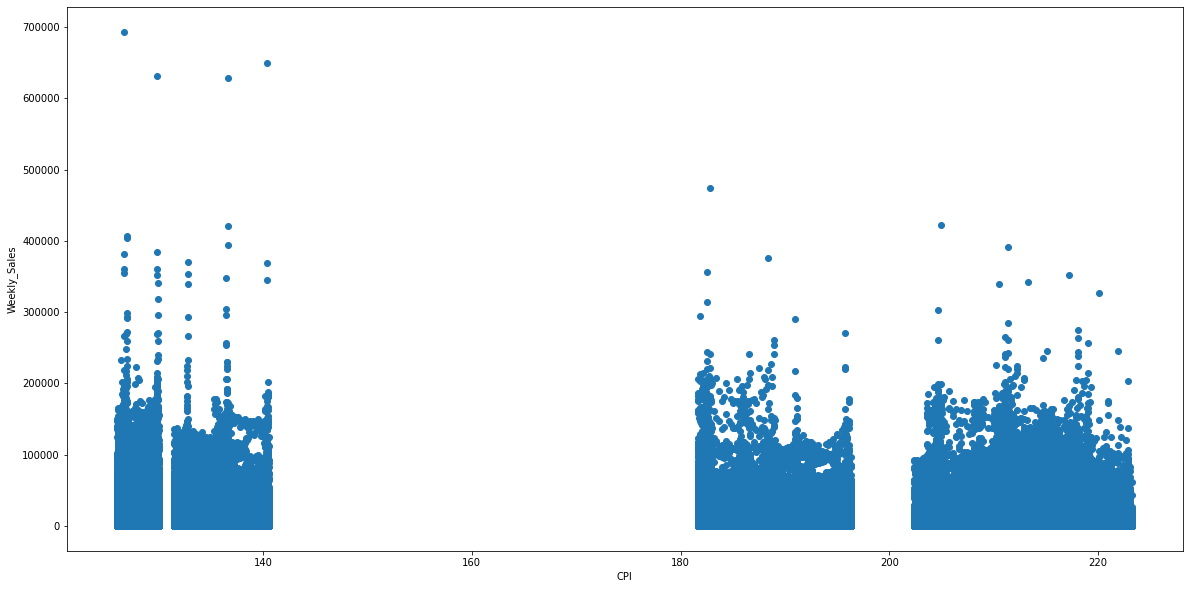

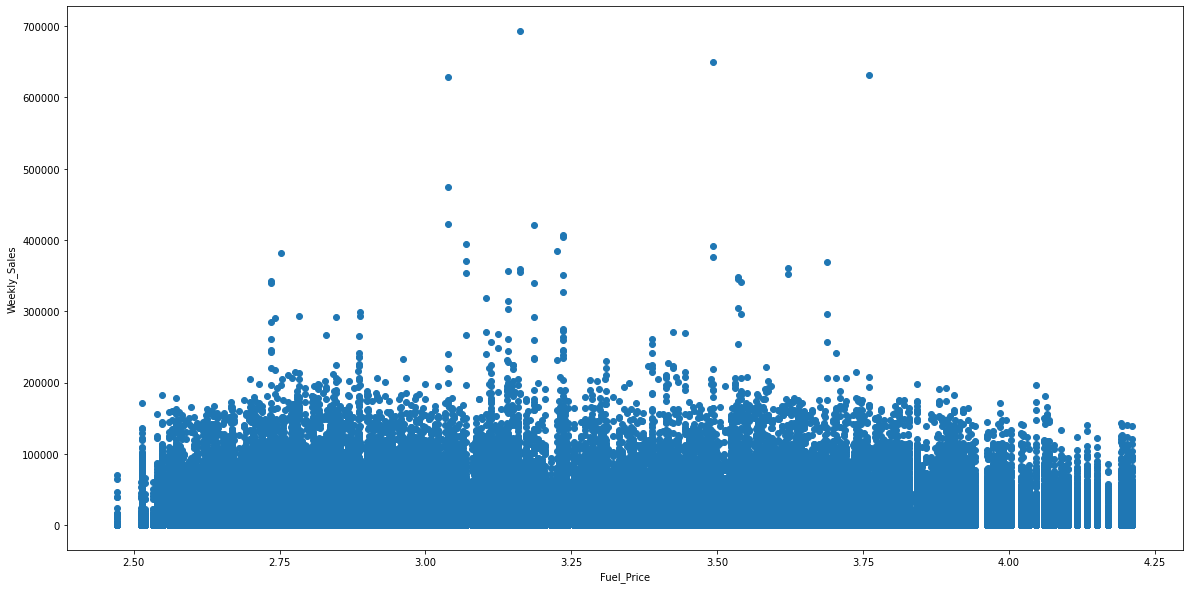

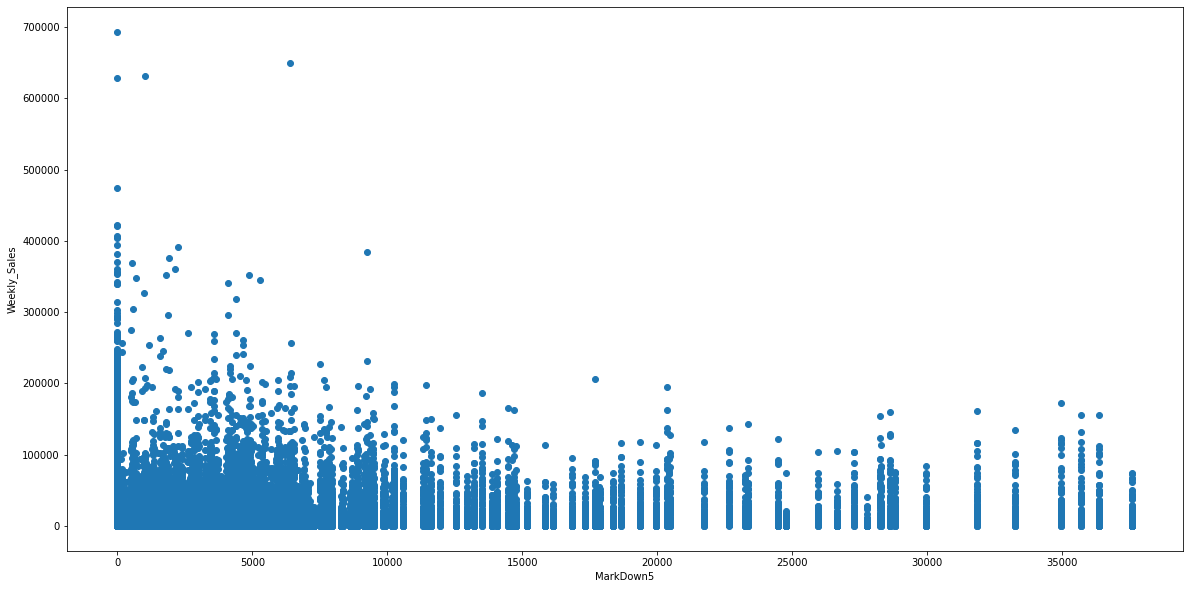

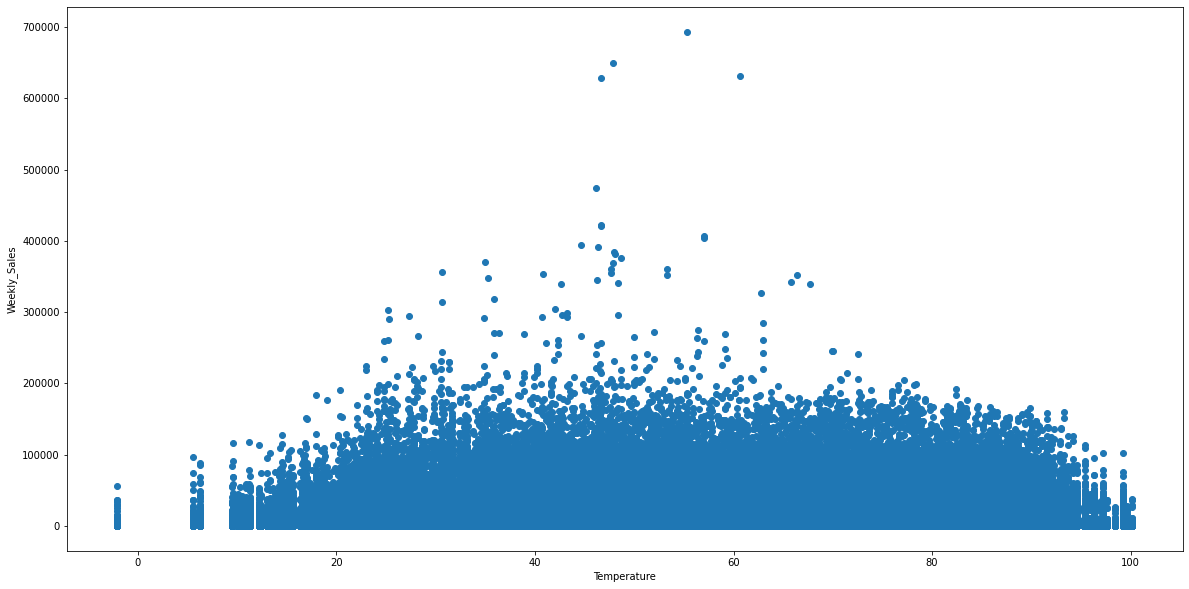

In [ ]:
#Checking the trend of predictors with dependent variables
var_list = [x for x in train_combine.columns]
#Grouping the dependent variables
columnstodrop = ['Weekly_Sales', 'Date']
var_list = list(set(var_list).difference(set(columnstodrop)))

for varname in var_list:
    plt.figure(figsize=(20,10))
    #ploting the graph below with weekly sales.
    plt.scatter(train_combine[varname], train_combine['Weekly_Sales'])
    plt.xlabel(varname); plt.ylabel("Weekly_Sales") #predictors is independent variable, weekly sales dependednt


In [ ]:
#Dependent variable trend with other variables.
all_corr = train_combine.corr().unstack().reset_index()
print(all_corr.shape)
#Correlation of weekly sales with other variables.
corr_table = all_corr[all_corr['level_1'] =='Weekly_Sales' ]
corr_table = corr_table.loc[ (corr_table['level_0'] != 'Weekly_Sales') ]
print(corr_table.shape)
#Observation and variables.
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
corr_table

(144, 3)
(11, 3)


,var1,var2,corr_value,corr_abs
132,Size,Weekly_Sales,0.242929,0.242929
72,MarkDown3,Weekly_Sales,0.044642,0.044642
96,MarkDown5,Weekly_Sales,0.038685,0.038685
48,MarkDown1,Weekly_Sales,0.035576,0.035576
84,MarkDown4,Weekly_Sales,0.031970,0.031970
120,Unemployment,Weekly_Sales,-0.025631,0.025631
108,CPI,Weekly_Sales,-0.021871,0.021871
60,MarkDown2,Weekly_Sales,0.016028,0.016028
12,IsHoliday,Weekly_Sales,0.013925,0.013925
24,Temperature,Weekly_Sales,-0.007911,0.007911


In [ ]:
# Combining the Date and week columns here.
train_combine['week_number'] = train_combine['Date2'].dt.week
train_combine['year_number'] = train_combine['Date2'].dt.year

<ipython-input-51-b56f37bfe975>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_combine['week_number'] = train_combine['Date2'].dt.week
<ipython-input-51-b56f37bfe975>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_combine['week_number'] = train_combine['Date2'].dt.week
<ipython-input-51-b56f37bfe975>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_combine['year_number'] = train_combine['Date2'].dt.year


In [ ]:
#Checking the holiday weeks with highest total sales
temper = train_combine.groupby('Date', as_index=False).agg({'Weekly_Sales':'sum'})
print(temper['Weekly_Sales'].mean())
temper = train_combine.groupby(['Date', 'IsHoliday', 'week_number', 'year_number'], as_index=False).agg({'Weekly_Sales':'sum'})
temper.loc[temper['IsHoliday'] == 1].sort_values(by = 'Weekly_Sales', ascending=False)

47371515.0689


,Date,IsHoliday,week_number,year_number,Weekly_Sales
94,2011-11-25,1,47,2011,66593835.85
42,2010-11-26,1,47,2010,65821216.26
1,2010-02-12,1,6,2010,48336800.10
53,2011-02-11,1,6,2011,47336816.90
83,2011-09-09,1,36,2011,46763760.42
99,2011-12-30,1,52,2011,46044300.91
31,2010-09-10,1,36,2010,45635418.66
47,2010-12-31,1,52,2010,40434740.42
